In [13]:
import os
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df

,staID,DT,value,var,bad
0,161,1992-06-03 17:00:00,0.00000,RF,False
1,161,1992-06-03 17:00:00,94.30000,RH_1,False
2,161,1992-06-03 17:00:00,454.80000,SWup,False
3,161,1992-06-03 17:00:00,11.24000,Tair_1,False
4,161,1992-06-03 18:00:00,0.00000,RF,False
...,...,...,...,...,...
886742,161,2021-08-21 14:00:00,18.24000,Tair_1,False
886743,161,2021-08-21,0.00000,RF,False
886744,161,2021-08-21,24.52000,RH_1,False
886745,161,2021-08-21,-4.83434,SWup,False


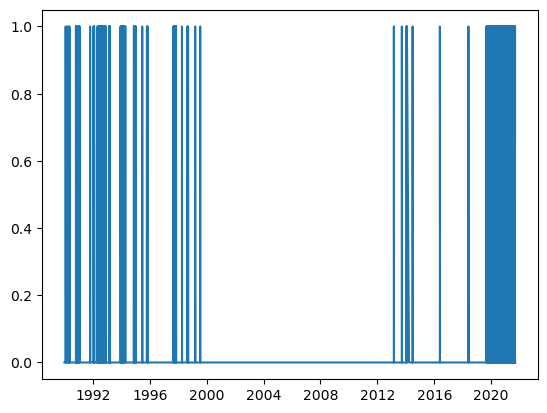

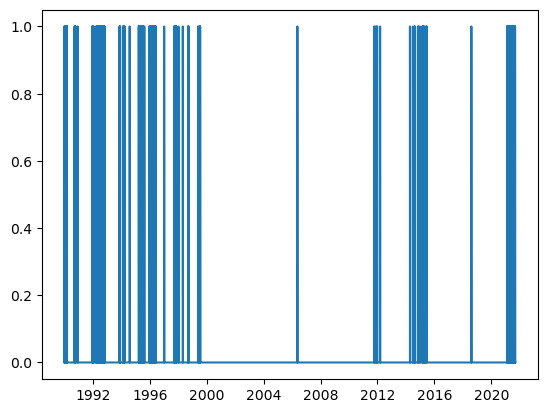

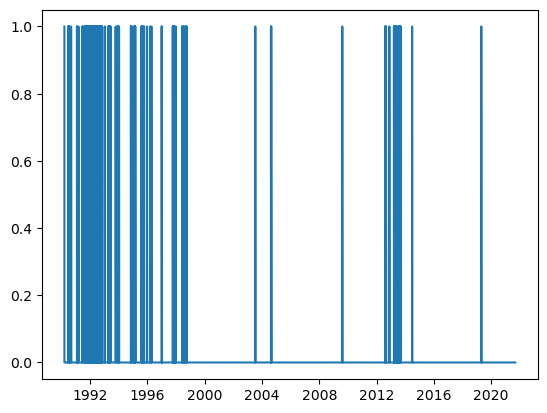

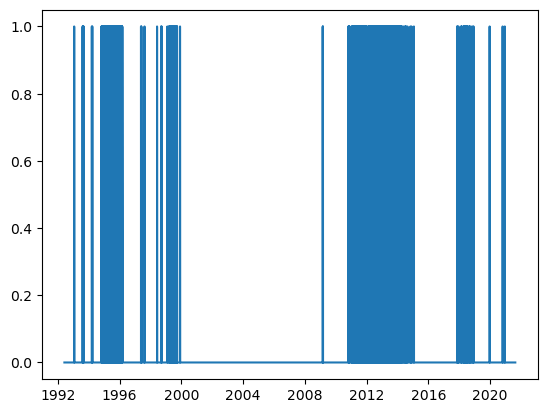

Bad count 82665, good count 3766465


In [17]:
csv_fns = glob(os.path.join('data', '*.csv'))

overall_bad_count = 0
overall_good_count = 0

for fn in csv_fns:
    df = pd.read_csv(fn)
    df = df[df['DT'].str.contains(":")]
    df['DT'] = pd.to_datetime(df['DT'])
    bad_count = df[df['bad'] == True]['bad'].count()
    overall_bad_count += bad_count
    good_count = df[df['bad'] == False]['bad'].count()
    overall_good_count += good_count

    plt.plot(df['DT'], df['bad'])
    plt.show()
    
    # display(df)

print(f'Bad count {overall_bad_count}, good count {overall_good_count}')